<a href="https://colab.research.google.com/github/eftekhari-mhs/population-protocols/blob/master/Exact_Majority/Clock_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Let's look at the first time that 0.1 percent and 90 percent of the population claiming hour $i$:

In [ ]:
#@title Fix a population size, let's look at different pvalues and kvalues: (Average of 20 trials)

#@markdown make sure .txt files are uploaded

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"
import requests

# url = 'https://raw.githubusercontent.com/eftekhari-mhs/population-protocols/master/Exact_Majority/simulation_results/clock_hitting_time_p10_p90_'

#@markdown fix p=0.01 change k : "N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" (one way epidemic)

#@markdown fix p=0.01 change k : "N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" (two way epidemic)
nvalues_fixp = ["N_1000_LOG_20", "N_10000_LOG_20", "N_100000_LOG_20","N_1000000_LOG_20"]
#@markdown fix k=5 change p : "N_12146_LOG_13", "N_23141_LOG_14", "N_53022_LOG_15", "N_91829_LOG_16","N_211023_LOG_17"(one way epidemic)
nvalues_fixk = ["N_1000_LOG_20", "N_10000_LOG_20","N_100000_LOG_20","N_1000000_LOG_20"]
# population_size = "N_26544_LOG_14" #@param ["N_12146_LOG_13", "N_23141_LOG_14", "N_53022_LOG_15", "N_91829_LOG_16","N_211023_LOG_17","N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" ] 

# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

def plot_average(mylist, fixp, fixk):
  # fig, axs = plt.subplots(len(mylist),figsize=(15,15))
  fig, ax = plt.subplots(figsize = (6,3))
  if fixk:
    plt.title('time per synchronous hour in different n, p for fixed k = 5')    
  if fixp:
    plt.title('time per synchronous hour in different n, k for fixed p = 0.01') 
    slopes = []   
  i=0
  ns = []
  for nx in mylist:
    n = int(nx.split("_")[1])
    ns.append(n)
    logn = int(nx.split("_")[3])
    if fixk:
      nx = nx + "_fixk"
    if fixp:
      nx = nx + "_fixp"
    filename = path+nx+".txt"
    
    # req = requests.get(filename, stream=True)
    
    file = open(filename, 'r') 
    Lines = file.readlines()     
    line_number = 0
    ave_fixk = {}
    ave_fixp = {}
    # Strips the newline character 
    for line in Lines: 
    # for line in req.iter_lines():
      # line = line[2:-1]
      # line = line.decode("utf-8")       
      line_number = line_number + 1  
      if line != '404: Not Found':                    
        if line_number%2 == 1:
          s = line.strip().split("_")        
          pvalue = float(s[1])      
          kvalue = int(s[3])              
        else: 
          diff = [float(s) for s in line.strip()[1:-1].split(",")]    
          if kvalue ==5:
            ave_fixk[pvalue]= np.mean(diff)
          if pvalue ==0.01:
            ave_fixp[kvalue]= np.mean(diff)        
      else:
        print(line)
    
    if fixk:
      lists = sorted(ave_fixk.items()) # sorted by key, return a list of tuples
    if fixp:
      lists = sorted(ave_fixp.items()) # sorted by key, return a list of tuples      
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    x = np.array(x)
    y = np.array(y) 
    ax.plot(x, y)    
    if fixp:
      model = LinearRegression().fit(x.reshape((-1, 1)), y)
      slopes.append(model.coef_[0])
    # plt.plot(x[outlier:], y[outlier:])
  plt.ylabel("time per synchronous hour")   
  if fixk:
    plt.xlabel("p")
    plt.legend([f'n = 10^{int(np.log10(n))}' for n in ns])  
    # axs[i].set_yscale('log')
    # axs[i].set_xscale('log')
    # axs[i].set_title(f"pvalues, n = {n}")      
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    # ax.set_title(f"pvalues, n = {n}")    
    # plt.xlabel(f"pvalues, k = 5, n = {n}")
  if fixp:
    plt.xlabel("k")
    plt.legend([f'n = 10^{int(np.log10(n))}, slope = {slope:.3f}' for n, slope in zip(ns, slopes)])  
    # axs[i].set_title(f"kvalues, n = {n}")      
    # ax.set_title(f"kvalues, n = {n}")    
    ax.set_xticks(np.arange(1,21,1))
    # plt.xlabel(f"kvalues, n = {n}")
  i+=1
  return fig, ax

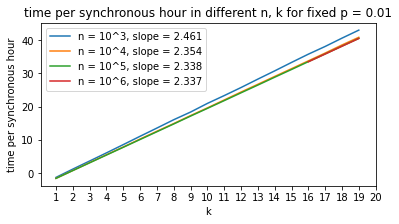

In [ ]:
fig, ax = plot_average(nvalues_fixp, True, False)
fig.savefig('hour_length_varying_k.pdf')
fig.savefig('hour_length_varying_k.svg')

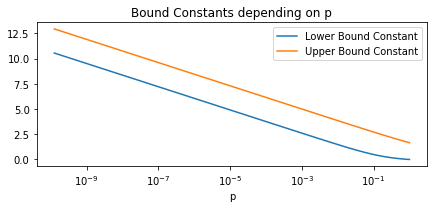

In [ ]:
from scipy.integrate import quad

ps = [10 ** (i/10) for i in range(0, -100, -1)]
lower_bound_constants = []
upper_bound_constants = []
for p in ps:
  lower_bound_constants.append(quad(lambda x: 1 / (p * ((1 - x) ** 2) + 2 * x * (1-x)), 0.1*p, 0.1)[0])
  upper_bound_constants.append(quad(lambda x: 1 / (p * ((0.9 - x) ** 2) + 2 * x * (1-x)), 0, 0.9)[0])
fig = plt.figure(figsize = (6,3))
plt.plot(ps, lower_bound_constants)
plt.plot(ps, upper_bound_constants)
plt.xscale("log")
plt.xlabel("p")
plt.title("Bound Constants depending on p")
plt.legend(["Lower Bound Constant", "Upper Bound Constant"])
plt.tight_layout()
fig.savefig('bound_constants.pdf')
fig.savefig('bound_constants.svg')

Pvalue_0.100000_Kvalue_5_AverageOf_20
[3.61, 3.62, 3.52, 3.61, 3.64, 3.55, 3.47, 3.66, 3.48, 3.5, 3.55, 3.56, 3.55, 3.6, 3.57, 3.62, 3.66, 3.71, 3.64]
Pvalue_0.200000_Kvalue_5_AverageOf_20
[2.45, 2.51, 2.53, 2.37, 2.33, 2.41, 2.53, 2.46, 2.44, 2.5, 2.45, 2.44, 2.38, 2.37, 2.49, 2.34, 2.51, 2.44, 2.49]
Pvalue_0.400000_Kvalue_5_AverageOf_20
[1.65, 1.57, 1.57, 1.45, 1.54, 1.6, 1.43, 1.47, 1.53, 1.57, 1.49, 1.48, 1.5, 1.47, 1.54, 1.53, 1.57, 1.51, 1.54]
Pvalue_0.800000_Kvalue_5_AverageOf_20
[1.01, 0.78, 0.75, 0.8, 0.81, 0.83, 0.85, 0.83, 0.76, 0.73, 0.8, 0.83, 0.85, 0.79, 0.77, 0.83, 0.76, 0.78, 0.74]
Pvalue_0.010000_Kvalue_5_AverageOf_20
[8.89, 8.94, 8.7, 8.95, 8.57, 8.93, 8.44, 8.75, 8.9, 8.52, 8.62, 8.55, 9.26, 8.79, 8.68, 8.8, 8.6, 8.33, 8.77]
Pvalue_0.020000_Kvalue_5_AverageOf_20
[6.86, 6.84, 6.73, 6.77, 6.84, 6.86, 6.87, 7.02, 6.9, 6.95, 6.96, 6.68, 6.96, 6.73, 6.99, 6.82, 7.02, 7.09, 6.72]
Pvalue_0.040000_Kvalue_5_AverageOf_20
[5.34, 5.31, 5.36, 5.54, 5.32, 5.17, 5.49, 5.45, 5.41, 5

ValueError: ignored

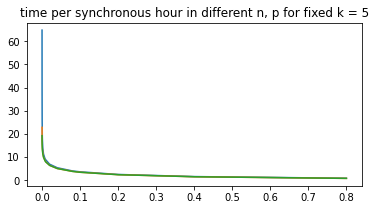

In [ ]:
fig, ax = plot_average(nvalues_fixk, False, True)

ps = [10 ** (i/10) for i in range(0, -40, -1)]
lower_bounds = []
upper_bounds = []
for p in ps:
  lower_bounds.append(quad(lambda x: 1 / (p * ((1 - x) ** 2) + 2 * x * (1-x)), 0.1*p, 0.1)[0] * 4 - 2.2)
  upper_bounds.append(quad(lambda x: 1 / (p * ((0.9 - x) ** 2) + 2 * x * (1-x)), 0, 0.9)[0] * 5)

plt.plot(ps, lower_bounds, linestyle = 'dashed', color = 'k')
plt.plot(ps, upper_bounds, linestyle = 'dotted', color = 'k')
plt.ylim(0, 35)
plt.legend([f'n = 10^{i}' for i in range(3,7)] + ['lower bound', 'upper bound'])
fig.savefig('hour_length_varying_p.pdf')
fig.savefig('hour_length_varying_p.svg')


Pvalue is 1.0 and Kvalue is 5 (number of minutes per hour).
0.1%: [306415762, 290838295, 275256938, 259687323, 244141334, 228556844, 212972138, 197413405, 181845265, 166278083, 150733646, 135160984, 119581352, 104031382, 88437108, 72899413, 57300651, 41730662, 26156938, 10637077, 2801, 1]
90%: [318926432, 303335214, 287771278, 272204766, 256638054, 241059618, 225494440, 209933511, 194362983, 178791427, 163220120, 147641044, 132084444, 116500207, 100939715, 85376875, 69809093, 54239607, 38671348, 23100618, 6437979, 1]


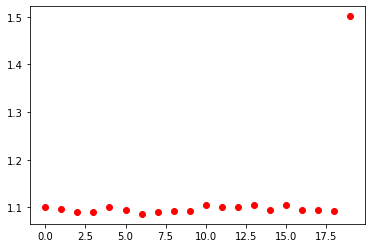

Pvalue is 0.1 and Kvalue is 5 (number of minutes per hour).
0.1%: [728851865, 692097351, 655453030, 618754398, 582052722, 545358895, 508740602, 472094989, 435366721, 398703362, 361996846, 325288679, 288604518, 251938826, 215233064, 178551309, 141868771, 105126392, 68508727, 31777798, 27788, 1]
90%: [746580806, 709881766, 673208665, 636517292, 599825102, 563152094, 526532009, 489839578, 453145998, 416447483, 379754777, 343040738, 306402620, 269688075, 233007536, 196327264, 159609505, 122892509, 86230801, 49516249, 12616681, 1]


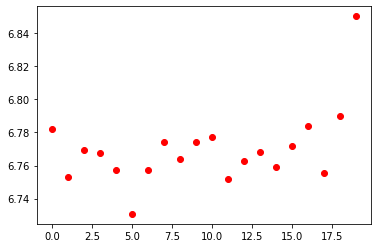

Pvalue is 0.01 and Kvalue is 5 (number of minutes per hour).
0.1%: [1303598360, 1238303287, 1173119350, 1107592432, 1042279625, 977030992, 911731479, 846277978, 780966036, 715561261, 650308004, 584895356, 519673910, 454437470, 389114772, 323768259, 258639866, 193275243, 127940960, 62667842, 268138, 1]
90%: [1325392380, 1260053024, 1194762523, 1129241082, 1063933555, 998730110, 933452246, 867999842, 802658646, 737272378, 672044996, 606679797, 541389948, 476169227, 410773269, 345517329, 280320352, 214913584, 149622616, 84393607, 19004908, 1]


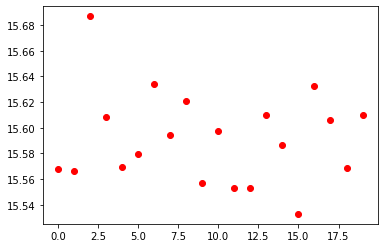

Pvalue is 0.001 and Kvalue is 5 (number of minutes per hour).
0.1%: [1933030348, 1836266247, 1739096370, 1642190268, 1545630057, 1448563041, 1351998890, 1255385285, 1158723553, 1063792361, 967427875, 872579006, 776035639, 678289544, 581514725, 484825844, 387659729, 291486427, 194804445, 98186314, 1912139, 1]
90%: [1957101822, 1860426960, 1763269531, 1666314076, 1569741733, 1472653537, 1376118921, 1279454958, 1182811356, 1087886945, 991609286, 896699976, 800042985, 702473704, 605635720, 508936071, 411799982, 315657252, 218959864, 122267610, 25407271, 1]


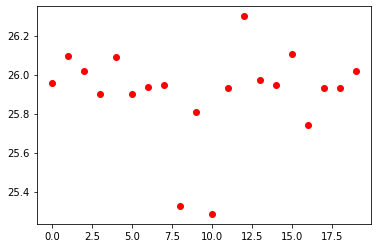

Pvalue is 0.0001 and Kvalue is 5 (number of minutes per hour).
0.1%: [-1700321010, -1828353916, -1958111560, -2088056798, 2078120841, 1948620997, 1819997923, 1691500551, 1562229664, 1432859014, 1303854265, 1174578925, 1045335891, 915683561, 786932098, 656716378, 526410191, 396541948, 265671649, 136029562, 6499904, 1]
90%: [-1675170243, -1803103966, -1932996274, -2062888558, 2103355765, 1973883689, 1845247650, 1716690269, 1587406614, 1458112111, 1329077353, 1199792955, 1070475905, 940946860, 812179505, 681803569, 551627749, 421691230, 290898397, 161218400, 31703149, 1]


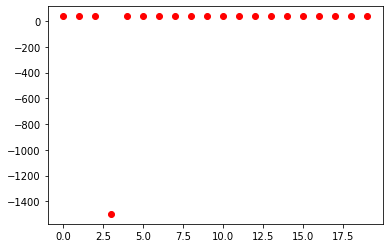

Pvalue is 1.0 and Kvalue is 4 (number of minutes per hour).
0.1%: [244130080, 231681927, 219211251, 206743640, 194292777, 181843348, 169369707, 156947759, 144440827, 132000212, 119561466, 107106161, 94673261, 82190533, 69768309, 57318096, 44852523, 32406546, 19941685, 7598832, 2800, 1]
90%: [256626434, 244165212, 231705677, 219241390, 206789770, 194334178, 181886950, 169434696, 156976863, 144525226, 132081418, 119611396, 107163932, 94721681, 82263959, 69813366, 57359086, 44893196, 32451893, 19978459, 6442143, 1]


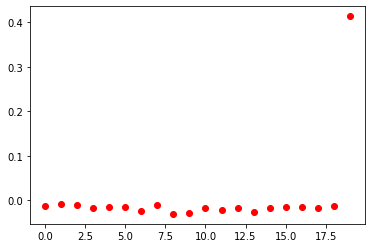

Pvalue is 0.1 and Kvalue is 4 (number of minutes per hour).
0.1%: [582280525, 552938686, 523590101, 494247260, 464861320, 435482687, 406092029, 376830464, 347457930, 318096823, 288704005, 259293085, 229945752, 200589349, 171205023, 141819069, 112426145, 83169899, 53709451, 24412628, 27665, 1]
90%: [600039180, 570659307, 541343499, 511996413, 482645571, 453268206, 423935800, 394560203, 365209244, 335818398, 306466447, 277083570, 247707984, 218340242, 188984546, 159599202, 130219877, 100889564, 71480707, 42177907, 12616021, 1]


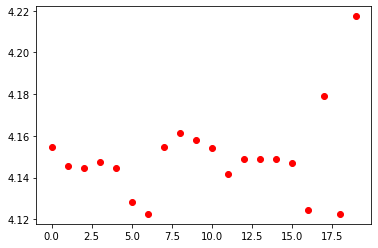

Pvalue is 0.01 and Kvalue is 4 (number of minutes per hour).
0.1%: [1042716916, 990469188, 938029071, 885820837, 833559743, 781463777, 729136683, 676755291, 624479734, 572212392, 519804371, 467771331, 415415854, 363415623, 311084496, 258744923, 206520029, 154360532, 102097923, 49793279, 265100, 1]
90%: [1064410945, 1012086113, 959795606, 907515577, 855255531, 803094134, 750836067, 698528664, 646220768, 593952630, 541609050, 489454203, 437157743, 384981873, 332742464, 280383691, 228174649, 176045515, 123760020, 71439244, 19019887, 1]


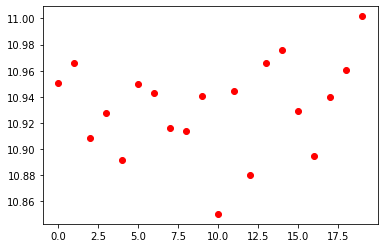

Pvalue is 0.001 and Kvalue is 4 (number of minutes per hour).
0.1%: [1547267821, 1469715652, 1392372576, 1315059154, 1238002361, 1160277364, 1082728687, 1005614684, 928552893, 851052351, 773877481, 696881443, 619188111, 541820424, 464988074, 387846054, 310302327, 232655484, 155570984, 78503073, 1914200, 1]
90%: [1571386381, 1493905296, 1416590732, 1339147293, 1262097994, 1184412851, 1106846513, 1029695838, 952685059, 875061301, 798094993, 720988297, 643248323, 565961627, 489072215, 411996241, 334387054, 256753987, 179708701, 102691127, 25469251, 1]


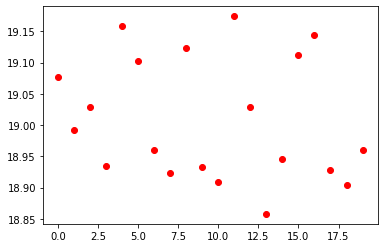

Pvalue is 0.0001 and Kvalue is 4 (number of minutes per hour).
0.1%: [2067159755, 1963070920, 1859601675, 1757019456, 1655989791, 1553887239, 1450758703, 1347162325, 1243978953, 1141961309, 1038596958, 936088188, 832941355, 730144902, 627676427, 523118772, 417590509, 314553256, 212241495, 108979656, 6708061, 1]
90%: [2092402989, 1988270814, 1884775252, 1782293352, 1681273127, 1579095047, 1475958097, 1372460771, 1269182883, 1167211010, 1063863668, 961241868, 858066983, 755432644, 652906543, 548355304, 442839654, 339631383, 237405248, 134175952, 31958311, 1]


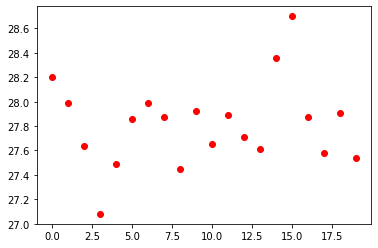

Pvalue is 1.0 and Kvalue is 3 (number of minutes per hour).
0.1%: [181842129, 172492657, 163167554, 153811897, 144455876, 135146023, 125794495, 116459184, 107139310, 97809199, 88467269, 79106423, 69788924, 60463003, 51086795, 41755876, 32418185, 23067728, 13729268, 4683403, 2800, 1]
90%: [194335726, 184996306, 175657132, 166326326, 156986176, 147651083, 138310428, 128970036, 119631733, 110293511, 100949943, 91617212, 82284129, 72941674, 63599235, 54252618, 44907887, 35579500, 26229776, 16842651, 6452393, 1]


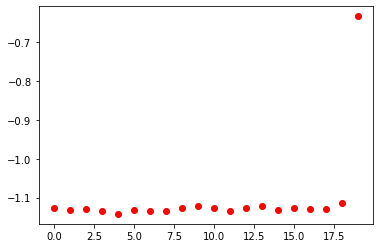

Pvalue is 0.1 and Kvalue is 3 (number of minutes per hour).
0.1%: [435465790, 413389900, 391408015, 369432089, 347403995, 325366697, 303380670, 281365545, 259273352, 237299216, 215286597, 193259598, 171263723, 149248492, 127159600, 105201593, 83196023, 61165853, 39090095, 17127742, 27997, 1]
90%: [453200744, 431206443, 409187286, 387186470, 365157474, 343125901, 321148426, 299120656, 277084523, 255068852, 233032949, 211000718, 188996079, 167004566, 144969109, 122942622, 100926015, 78915870, 56860904, 34862154, 12612086, 1]


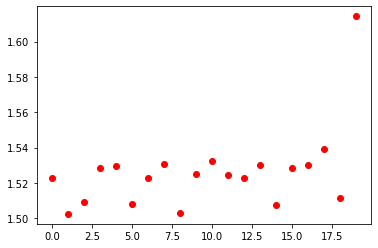

Pvalue is 0.01 and Kvalue is 3 (number of minutes per hour).
0.1%: [781989330, 742560926, 703526360, 664408966, 624945235, 585797179, 546608491, 507406264, 468179208, 428998749, 389586182, 350402600, 311383886, 272059126, 232843241, 193603371, 154331846, 115043909, 75846463, 36635515, 275646, 1]
90%: [803602737, 764345935, 725206277, 686058621, 646670866, 607456420, 568229710, 529115130, 489851185, 450605349, 411307073, 372092576, 333022304, 293732377, 254547008, 215299155, 176017763, 136769479, 97463201, 58346021, 19022310, 1]


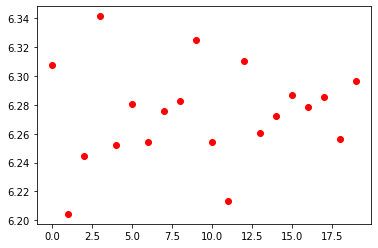

Pvalue is 0.001 and Kvalue is 3 (number of minutes per hour).
0.1%: [1164251455, 1105796403, 1047608668, 989302978, 931399555, 873198399, 815114679, 756846150, 698781598, 640584125, 582573857, 524389200, 466181340, 407806679, 349902433, 291613376, 233281463, 174982957, 117041383, 59331110, 1931562, 1]
90%: [1188351245, 1129943921, 1071759864, 1013378628, 955474689, 897284663, 839179993, 780912191, 722870979, 664731897, 606756889, 548579626, 490318390, 431937308, 374002852, 315746512, 257390517, 199156816, 141083106, 83382962, 25437744, 1]


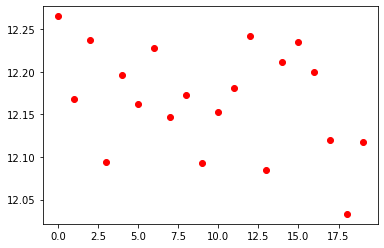

Pvalue is 0.0001 and Kvalue is 3 (number of minutes per hour).
0.1%: [1548802871, 1471963180, 1395268165, 1318126602, 1241126581, 1164040804, 1087139807, 1009826939, 934009184, 854736207, 777919046, 700796135, 623377651, 547435669, 469188178, 392042653, 316285054, 239106710, 161694377, 84274874, 6882096, 1]
90%: [1574023010, 1497305365, 1420449753, 1343402830, 1266393228, 1189319221, 1112445260, 1035001966, 959153879, 880027661, 803044855, 725988203, 648620126, 572659685, 494302843, 417177326, 341449356, 264314583, 187011763, 109439092, 32168119, 1]


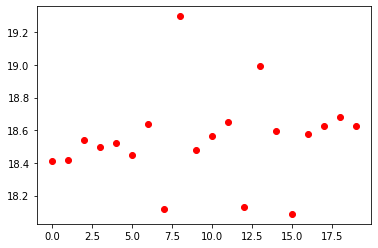

Pvalue is 1.0 and Kvalue is 2 (number of minutes per hour).
0.1%: [119590677, 113358439, 107146100, 100899018, 94663409, 88465604, 82223537, 75996663, 69770804, 63554342, 57318363, 51103382, 44854967, 38621697, 32403708, 26200660, 19950718, 13726090, 7573440, 2086156, 2798, 1]
90%: [132089258, 125866608, 119648704, 113409326, 107188106, 100957949, 94731262, 88505092, 82270483, 76049360, 69823878, 63590434, 57359617, 51134127, 44904139, 38680422, 32453389, 26230345, 19986361, 13665729, 6441919, 1]


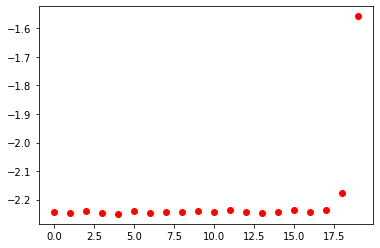

Pvalue is 0.1 and Kvalue is 2 (number of minutes per hour).
0.1%: [288581657, 273910164, 259257682, 244572732, 229949623, 215233266, 200622401, 185921872, 171176010, 156517545, 141786510, 127178148, 112499532, 97781374, 83130605, 68497338, 53812964, 39065617, 24422003, 9798962, 27813, 1]
90%: [306365496, 291696072, 277038032, 262357684, 247706568, 233029927, 218354990, 203652715, 188965632, 174271687, 159607343, 144929030, 130235785, 115564168, 100885723, 86233613, 71550105, 56873908, 42196950, 27505360, 12621703, 1]


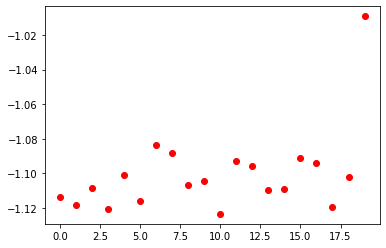

Pvalue is 0.01 and Kvalue is 2 (number of minutes per hour).
0.1%: [520320674, 494254008, 468034473, 441908847, 415667736, 389541624, 363438243, 337321844, 311140971, 285032324, 258904506, 232755506, 206457381, 180438378, 154125988, 128131652, 101827034, 75678179, 49619392, 23475864, 255212, 1]
90%: [541973568, 515874104, 489659951, 463554565, 437415176, 411299672, 385128916, 358989444, 332889513, 306694762, 280493459, 254346298, 228129951, 202035793, 175842946, 149742076, 123495833, 97409716, 71300507, 45134523, 19035246, 1]


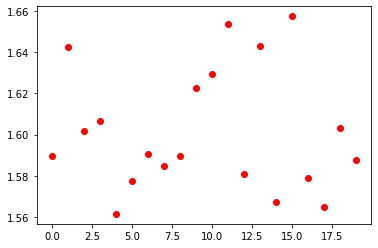

Pvalue is 0.001 and Kvalue is 2 (number of minutes per hour).
0.1%: [776913217, 738170266, 699074041, 660758040, 621656137, 582657935, 543822626, 505310171, 466470375, 427900809, 389370212, 350831685, 312094972, 273082326, 234334692, 195424350, 156809047, 117743516, 78723089, 40063180, 1933459, 1]
90%: [801057485, 762236950, 723226864, 684751344, 645828528, 606864226, 567950582, 529375148, 490627881, 451986872, 413482239, 374945431, 336253142, 297256686, 258409408, 219496050, 180885567, 141821132, 102913519, 64199731, 25450713, 1]


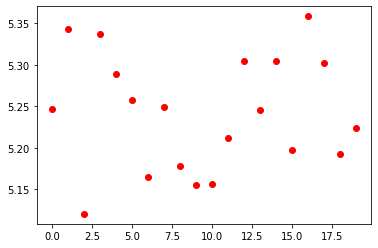

Pvalue is 0.0001 and Kvalue is 2 (number of minutes per hour).
0.1%: [1036737541, 984641474, 932761982, 880929205, 829759896, 778433507, 727977692, 676640743, 625815152, 572891609, 521886409, 470361671, 419802978, 368801608, 317404184, 265902016, 214070969, 161759366, 109411802, 58160592, 6768683, 1]
90%: [1062016976, 1009894246, 957964431, 906044713, 855054131, 803657574, 753138170, 701876436, 651089175, 598180793, 547073464, 495571939, 444857734, 394092198, 342689829, 291170370, 239212615, 186982192, 134637670, 83317913, 31901212, 1]


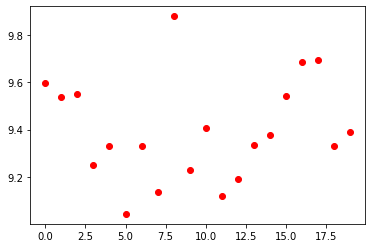

Pvalue is 1.0 and Kvalue is 1 (number of minutes per hour).
0.1%: [57312559, 54199098, 51075900, 47956844, 44861639, 41744454, 38630850, 35512032, 32393674, 29277598, 26158901, 23058027, 19945809, 16813064, 13716481, 10636466, 7588280, 4655404, 2083986, 415794, 2799, 1]
90%: [69814793, 66699379, 63590421, 60471308, 57361237, 54247324, 51127701, 48018304, 44900514, 41791673, 38679446, 35558107, 32449183, 29329772, 26213368, 23103362, 19979498, 16850823, 13665033, 10329869, 6442312, 1]


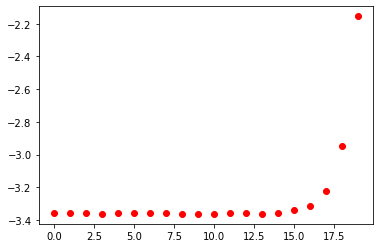

Pvalue is 0.1 and Kvalue is 1 (number of minutes per hour).
0.1%: [141854820, 134513678, 127199432, 119833958, 112495983, 105113562, 97789742, 90464323, 83170305, 75857831, 68450734, 61159937, 53763968, 46526222, 39095464, 31752605, 24433010, 17167101, 9836594, 3065757, 28833, 1]
90%: [159607647, 152296212, 144947835, 137618006, 130259048, 122925519, 115563888, 108229695, 100905299, 93576681, 86225825, 78890783, 71557175, 64245034, 56896574, 49542866, 42206818, 34872594, 27520797, 20167739, 12625446, 1]


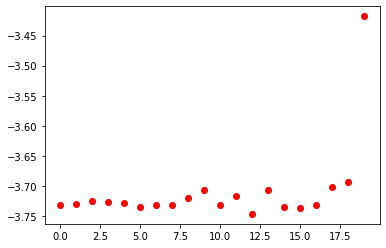

Pvalue is 0.01 and Kvalue is 1 (number of minutes per hour).
0.1%: [258795634, 245724651, 232624217, 219616602, 206584638, 193518644, 180475927, 167320523, 154265032, 141245973, 128136650, 115143012, 102119993, 88980318, 75713006, 62723813, 49476651, 36568602, 23457052, 10462660, 263699, 1]
90%: [280454838, 267408871, 254356272, 241301322, 228250702, 215147088, 202139848, 189021829, 175943531, 162938382, 149842809, 136792477, 123748795, 110622136, 97480269, 84407100, 71224057, 58283026, 45168167, 32127644, 19037738, 1]


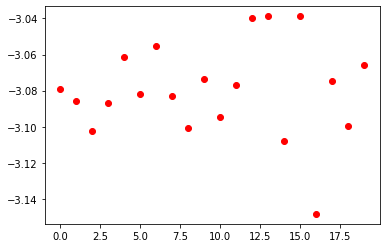

Pvalue is 0.001 and Kvalue is 1 (number of minutes per hour).
0.1%: [387484294, 368375871, 348998806, 329488260, 310294395, 290644797, 271241866, 252005249, 232710263, 213498855, 193954496, 174687131, 155471897, 136007622, 117184614, 98008658, 78729288, 59502272, 40152562, 20831129, 1984068, 1]
90%: [411607466, 392465289, 373119756, 353604294, 334368595, 314768956, 295369182, 276134862, 256869944, 237580970, 218115254, 198772672, 179498819, 160158589, 141287628, 122160301, 102846161, 83570350, 64290209, 44890843, 25476659, 1]


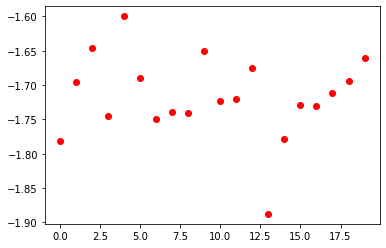

Pvalue is 0.0001 and Kvalue is 1 (number of minutes per hour).
0.1%: [523362230, 497232113, 471572492, 445882821, 420073619, 393912566, 368461055, 342922496, 316690304, 291182359, 265426423, 239749024, 213190124, 187414606, 161012871, 135196640, 108724325, 82856479, 56621256, 30879620, 6593753, 1]
90%: [548565429, 522489426, 496791343, 471110871, 445315757, 419163490, 393636248, 368075145, 341893339, 316396970, 290587608, 264978865, 238501749, 212699084, 186310576, 160392133, 134026255, 108065700, 81825245, 56092395, 31761026, 1]


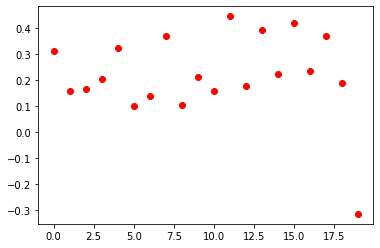

In [ ]:
#@title Fix a population size, let's look at different pvalues and kvalues:
#
#@markdown make sure .txt files are uploaded

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"

population_size = "N_2797144_LOG_21" #@param ["N_613213_LOG_19", "N_2797144_LOG_21"]
n = int(population_size.split("_")[1])
logn = int(population_size.split("_")[3])
filename = path+population_size+".txt"
# Using readlines() 
file1 = open(filename, 'r') 
Lines = file1.readlines() 

pvalue = 0.1;
kvalue = 1;
count = 0
# Strips the newline character 
for line in Lines: 
    count+=1
    # print("Line{}: {}".format(count, line.strip()))   
    if count%3 == 1:
      s = line.strip().split("_")
      # print(s)
      pvalue = float(s[1])      
      kvalue = int(s[3])      
      print(f"Pvalue is {pvalue} and Kvalue is {kvalue} (number of minutes per hour).") 
    elif count%3 == 2:      
      percent10 = [int(s) for s in line.strip()[1:-1].split(",")]      
      print(f"0.1%: {percent10}")
    else: 
      percent90 = [int(s) for s in line.strip()[1:-1].split(",")]
      print(f"90%: {percent90}")
      # plt.plot(np.array(percent90[1:])/n,'g*', np.array(percent10[:-1])/n, 'ro')
      plt.plot(np.array(percent10[:-2])/n- np.array(percent90[1:-1])/n, 'ro')
      plt.show()
      # diff = [(a_i - b_i)/n for a_i, b_i in zip(percent90, percent10)]
      # plt.plot(diff, 'bo')
      plt.show()


In [ ]:
print(os.listdir(r'/content/drive/My Drive/Colab_majority'))

NameError: ignored

From the above computation, we can observe that ``pvalue = 1`` or ``kvalue =1`` are not good choices. In some of the plots the difference is not stable. 

#### Fixing pvalue and kvalue, increasing population size:

In [ ]:
#@title Fix the pvalues and kvalues, let's look at different population sizes:
#
#@markdown make sure .txt files are uploaded
#
# Import the required libraries

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"

# population_size = "P_0.100000_K_3" #@param ["P_0.100000_K_2", "P_0.100000_K_3", "P_0.100000_K_4", "P_0.100000_K_5", "P_0.010000_K_2", "P_0.010000_K_2", "P_0.010000_K_3"]
kval = "3" #@param ["2", "3", "4", "5"]
pval = "0.1" #@param ["0.1", "0.01", "0.001", "0.0001"]
# p = float(population_size.split("_")[1])
# k = int(population_size.split("_")[3])

pvalue = float(pval)
k = int(kval)

pk_description = "P_{:.6f}_K_{}".format(float(pvalue), k)
filename = path+pk_description+".txt"
# Using readlines() 
file1 = open(filename, 'r') 
Lines = file1.readlines() 
  
count = 0
# Strips the newline character 
n = 1;
logn = 1;
for line in Lines: 
    count+=1
    # print("Line{}: {}".format(count, line.strip()))
    if count%3 == 1:
      s = line.strip().split("_")
      # print(s)
      n = int(s[1])      
      logn = int(s[3])      
      print(f"Population size (n) is {n} and log(n) is {logn} (number of hours).") 
    elif count%3 == 2:      
      percent10 = [int(s) for s in line.strip()[1:-1].split(",")]      
      print(f"10%: {percent10}")
    else: 
      percent90 = [int(s) for s in line.strip()[1:-1].split(",")]
      print(f"90%: {percent90}")
      # plt.plot(percent10,'g*', percent90, 'ro')
      # plt.show()
      diff = [(a_i - b_i)/n for a_i, b_i in zip(percent90, percent10)]
      plt.plot(diff, 'bo')
      plt.show()


# Plots from Java simuations

**To use this notebook, click on 'Runtime' and select 'Run all'**.

In [ ]:
#@title Technical details: data selection
#
#
#@markdown make sure .txt files are uploaded
#

_PATH = "/content/drive/My Drive/Colab Notebooks/constant_interval_clock_"
_LEVEL = "levels_"
_DRIP = "drip_"

_LEVELD = "levelsd_"
_DRIPD = "dripd_"

def get_clock_levels(filename, size, k):
  exist = True
  try:
    df = pd.read_csv(_PATH+filename+size+".txt", delimiter="\s+|;|,|\[|\]",
                                      names=None, 
                                      header=None, 
                                      engine="python")  
    df.dropna(axis=1, inplace=True)
    df.columns = [str(x) for x in range(0,_LOG*k+1)]  
          
  except:
    exist = False;
    df = pd.DataFrame
    print("there is no %s files"%filename)  
  return df, exist


In [ ]:
#@title Select a population size to plot { run: "auto" }
## @markdown N: population size; LOG: log(N); PValue: dripping probability ; K: max level = k*log n
## @markdown Every screen shot is taken after n/2 interactions for "N_16065_LOG_13", "N_28187_LOG_14", "N_154285_LOG_17", "N_487291_LOG_18", "N_2439409_LOG_21",
## @markdown Every screen shot is taken after n interactions for "N_5311784_LOG_22", "N_13871538_LOG_23", "N_18483817_LOG_24"
## @markdown clock with leak: "N_90010_LOG_16","N_120069_LOG_16"

## @markdown delayed: "N_3422_LOG_11", "N_16464_LOG_14"
## @markdown pvalue : 1 "N_746972_LOG_19", "N_3738_LOG_11"
file_description = "N_18353_LOG_14" #@param ["N_14505_LOG_13", "N_18353_LOG_14"]

_N = int(file_description.split('_')[1])
_LOG = int(file_description.split('_')[3])
p_value = "0.1"#@param ["1", "0.1", "0.01", "0.001", "0.0001"]
k = "2"#@param ["1", "2", "3", "4", "5"]

file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, float(p_value), k)

_PVALUE = float(file_description.split('_')[5])
_K = int(file_description.split('_')[7])

print("n: ",_N, "; log(n): ",_LOG, "; dripping probability:", _PVALUE, "; max level: ", _K, "log(n)")

try:
  levels, exist= get_clock_levels(_LEVEL,file_description, _K)
  drips, exist = get_clock_levels(_DRIP, file_description, _K)
except:
  print("file is missing!")

# try:
#   levels_d, exist= get_clock_levels(_LEVELD,file_description, _K)
#   drips_d, exist = get_clock_levels(_DRIPD, file_description, _K)
# except:
#   print("delayed file is missing!")


In [ ]:
levels

In [ ]:
# levels_d

In [ ]:
# dripped count only
drips

In [ ]:
#@title Technical details: plotting
#
def state_bar_plot(data, time, yscale = "linear"):
  dist = [data[str(i)][time] for i in range(0,_LOG*_K + 1)]
  plt.figure(figsize=(12,6))
  plt.bar(range(-_LOG,_LOG + 1),dist)
  plt.title(f"Time step {time}")
  plt.yscale(yscale)
  plt.ylim(bottom = 1, top = _N)
  plt.show()

def drip_bar_plot(total, drip, time, yscale = "linear"):
  total_dist = np.array([total[str(i)][time] for i in range(0,_LOG*_K + 1)])
  drip_dist = np.array([drip[str(i)][time] for i in range(0,_LOG*_K + 1)])
  no_drip_dist = total_dist - drip_dist
  plt.figure(figsize=(12,6))
  plt.bar(range(0,_LOG*_K + 1),no_drip_dist)
  plt.bar(range(0,_LOG*_K + 1),drip_dist, bottom = no_drip_dist)
  plt.legend(["Epidemic","Drip"])
  plt.title(f"Time step {time}")
  plt.hlines(y=(math.sqrt(_N))/_PVALUE, xmin=0, xmax=_LOG*_K , colors='aqua', linestyles='-', lw=2, label='n^0.5')
  # plt.hlines(y=pow(_N,0.25), xmin=0, xmax=_LOG*_K , colors='green', linestyles='-', lw=2, label='n^0.25')
  # plt.hlines(y=pow(_N,0.75), xmin=0, xmax=_LOG*_K , colors='blue', linestyles='-', lw=2, label='n^0.75')
  plt.yscale(yscale)
  plt.ylim(bottom = 1, top = _N)
  plt.show()


# Visualizing Clock Movement


In [ ]:
print("Levels:")
# levels.plot(figsize=(12,6))
interact(drip_bar_plot, total = fixed(levels), drip = fixed(drips), time = widgets.IntSlider(min=0, max=len(levels)-1, step=1, value=0), yscale = ["linear", "log"])

In [ ]:
# print("LevelsD:")
# # levels.plot(figsize=(12,6))
# interact(drip_bar_plot, total = fixed(levels_d), drip = fixed(drips_d), time = widgets.IntSlider(min=0, max=len(levels_d)-1, step=1, value=0), yscale = ["linear", "log"])

## Comparing Pvalues: 


In [ ]:
# file name format: "N_139476_LOG_17_P_0.000100_K_5"
file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, .1, _K)

for i in range(4):    
  try:    
    _PVALUE = float(file_description.split('_')[5])
    print("n: ",_N, "; log(n): ",_LOG, "; drip probability:", _PVALUE, "; max level: ", _K, "log(n)")
    levels, exist= get_clock_levels(_LEVEL,file_description, _K)
    drips, exist = get_clock_levels(_DRIP, file_description, _K)
    interact(drip_bar_plot, total = fixed(levels), drip = fixed(drips), time = widgets.IntSlider(min=0, max=len(levels)-1, step=1, value=0), yscale = ["linear", "log"])
  except:
    print("file is missing!")
  _PVALUE = _PVALUE/10  
  file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, _PVALUE, _K)